In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [107]:
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data',
    sep= ',', header = None)

In [45]:
type(balance_data)

pandas.core.frame.DataFrame

In [109]:
balance_data

,target,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [110]:
balance_data = balance_data.rename(columns = {0:'target', 1:'feature_1', 2:'feature_2', 3:'feature_3', 4:'feature_4'})

In [235]:
class decision_tree_analysis():
    
    
    def __init__(self, df_X, df_Y, max_depth_v = [2, 3, 4, 5, 6, 7, 8, 15], min_samples_leaf_v = [2, 3, 5, 7, 9]):
        self.df_X = df_X
        self.df_Y = df_Y
        
    def hist_features(self):
        
        print("TARGET HISTOGRAM")
        print(self.df_Y)
        sns.countplot(x = 'target',data=self.df_Y, palette='hls')#x = 0, 
        plt.show()
        
        print("FEATURE HISTOGRAMS")
        for i in self.df_X.columns:
            sns.countplot(x = i, data=self.df_X, palette='hls')
            plt.show()
            
    def grid_search_tree(self):
        df_gs = pd.DataFrame(columns=['max_depth','min_samples_leaf','accuracy'
                              ,'is_B_call_B','is_B_call_L','is_B_call_R'
                              ,'is_L_call_B','is_L_call_L','is_L_call_R'
                              ,'is_R_call_B','is_R_call_L','is_R_call_R'
                              ,'precision_B','precision_L','precision_R'
                              ,'recall_B','recall_L','recall_R'
                             ]
                    )
        
        #### Grid Search
        for i in max_depth_v:
            for j in min_samples_leaf_v:
###for k in ["entropy","gini"]:
                clf = DecisionTreeClassifier(criterion = "entropy",
                    random_state = 100,max_depth = i, min_samples_leaf = j)
                clf = clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)

                acc = accuracy_score(y_test,y_pred)

                cc = confusion_matrix(y_test, y_pred)

                precision,recall,fbeta,d = precision_recall_fscore_support(y_test, y_pred)

                df_gs = df_gs.append({ 'max_depth': i
                                      ,'min_samples_leaf': j
                                      , 'accuracy': acc
                                      ,'is_B_call_B': cc[0][0]
                                      ,'is_B_call_L': cc[0][1]
                                      ,'is_B_call_R': cc[0][2]
                                      ,'is_L_call_B': cc[1][0]
                                      ,'is_L_call_L': cc[1][1]
                                      ,'is_L_call_R': cc[1][2]
                                      ,'is_R_call_B': cc[2][0]
                                      ,'is_R_call_L': cc[2][1]
                                      ,'is_R_call_R': cc[2][2]
                                      ,'precision_B':precision[0]
                                      ,'precision_L':precision[1]
                                      ,'precision_R':precision[2]
                                      ,'recall_B':recall[0]
                                      ,'recall_L':recall[1]
                                      ,'recall_R':recall[2]
                                     }, ignore_index=True)
        return df_gs
    
    def choose_meta_param(self):
        
        df_loc = self.grid_search_tree()
        df_loc = df_loc[df_loc['accuracy']==df_loc['accuracy'].max()]
        df_loc = df_loc[df_loc['max_depth']==df_loc['max_depth'].min()]
        df_loc = df_loc[df_loc['min_samples_leaf']==df_loc['min_samples_leaf'].max()]
        
        max_depth = int(df_loc['max_depth'].values[0])
        min_samples_leaf = int(df_loc['min_samples_leaf'].values[0])
        
        return max_depth, min_samples_leaf
    
    def decision_tree(self):
        
        max_depth, min_samples_leaf = self.choose_meta_param()
        
        clf_fin = DecisionTreeClassifier(criterion = "entropy"
                                         , random_state = 100
                                         , max_depth = max_depth
                                         , min_samples_leaf = min_samples_leaf
                                         )
        clf_fin = clf_fin.fit(X_train, y_train)
        y_pred = clf_fin.predict(X_test)

        acc = accuracy_score(y_test,y_pred)

        cc = confusion_matrix(y_test, y_pred)

        precision,recall,fbeta,d = precision_recall_fscore_support(y_test, y_pred)
        
        return acc, cc, precision, recall

In [211]:
#df_gs[df_gs['accuracy']==df_gs['accuracy'].max()]

In [131]:
X = balance_data.iloc[:, 1:5]
Y = balance_data.iloc[:, 0:1]

In [226]:
type(r1.values[0])

numpy.float64

In [234]:
print(r1)
print(r2)

6.0
7.0


In [236]:
#r1,r2 = dta.choose_meta_param()

In [237]:
dta = decision_tree_analysis(X,Y#balance_data[:, 1:5], balance_data[:, 0]
)

In [239]:
acc

0.7925531914893617

In [240]:
cc

array([[ 0,  6,  7],
       [ 4, 72,  9],
       [ 5,  8, 77]], dtype=int64)

In [238]:
acc, cc, precision, recall = dta.decision_tree()

C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\li

In [214]:
aaa

,max_depth,min_samples_leaf,accuracy,is_B_call_B,is_B_call_L,is_B_call_R,is_L_call_B,is_L_call_L,is_L_call_R,is_R_call_B,is_R_call_L,is_R_call_R,precision_B,precision_L,precision_R,recall_B,recall_L,recall_R
23,6.0,7.0,0.792553,0.0,6.0,7.0,4.0,72.0,9.0,5.0,8.0,77.0,0.0,0.837209,0.827957,0.0,0.847059,0.855556


In [213]:
aaa = dta.choose_meta_param()

C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\li

TARGET HISTOGRAM
    target
0        B
1        R
2        R
3        R
4        R
..     ...
620      L
621      L
622      L
623      L
624      B

[625 rows x 1 columns]


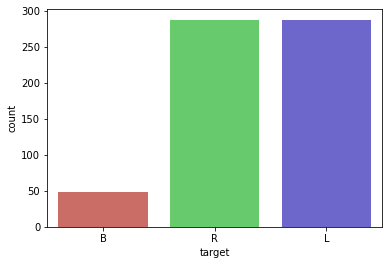

FEATURE HISTOGRAMS


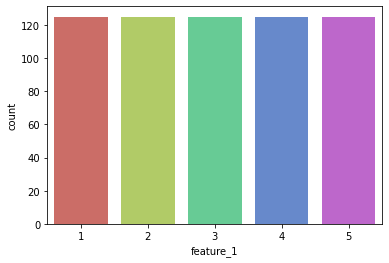

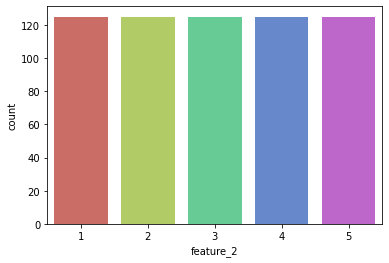

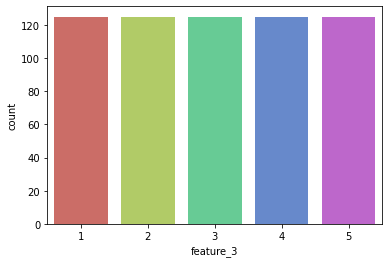

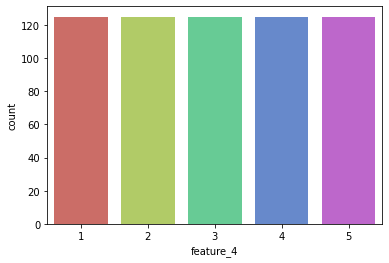

In [135]:
dta.hist_features()

In [183]:
my_df = dta.choose_tree()

C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\li

In [195]:
my_df[(my_df['max_depth']==7) & (my_df['min_samples_leaf']>=7)][['min_samples_leaf','accuracy','precision_L','precision_R','recall_L','recall_R']]

,min_samples_leaf,accuracy,precision_L,precision_R,recall_L,recall_R
28,7.0,0.792553,0.837209,0.827957,0.847059,0.855556
29,9.0,0.771277,0.809524,0.785714,0.800000,0.855556


In [44]:
balance_data[0].unique()

array(['B', 'R', 'L'], dtype=object)

In [46]:
balance_data[0].value_counts()

R    288
L    288
B     49
Name: 0, dtype: int64

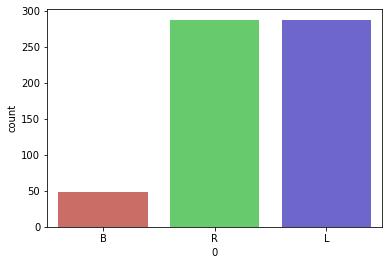

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=0,data=balance_data, palette='hls'
             )
#plt.xticks(rotation = 45)
plt.show()

In [53]:
balance_data.head(10)

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


1    125
2    125
3    125
4    125
5    125
Name: 1, dtype: int64


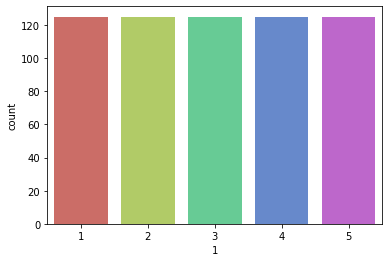

In [57]:
print(balance_data[1].value_counts())
sns.countplot(x=1,data=balance_data, palette='hls'
             )
#plt.xticks(rotation = 45)
plt.show()

1    125
2    125
3    125
4    125
5    125
Name: 2, dtype: int64


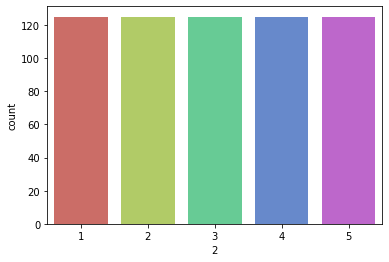

In [58]:
print(balance_data[2].value_counts())
sns.countplot(x=2,data=balance_data, palette='hls'
             )
#plt.xticks(rotation = 45)
plt.show()

1    125
2    125
3    125
4    125
5    125
Name: 3, dtype: int64


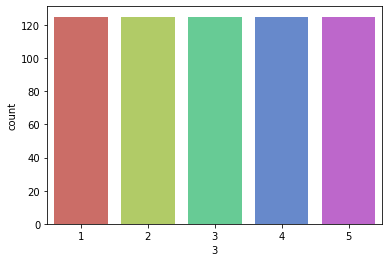

In [59]:
print(balance_data[3].value_counts())
sns.countplot(x=3,data=balance_data, palette='hls'
             )
#plt.xticks(rotation = 45)
plt.show()

In [60]:
balance_data.groupby(0).count()


,1,2,3,4
0,,,,
B,2.938776,2.938776,2.938776,2.938776
L,3.611111,3.611111,2.399306,2.399306
R,2.399306,2.399306,3.611111,3.611111


In [192]:
%matplotlib inline
pd.crosstab(balance_data[4],balance_data[0]).plot(kind='bar'#, stacked=True
                                 )
#plt.title('Purchase Frequency for Job Title')
#plt.xlabel('Job')
#plt.ylabel('Frequency of Purchase')

KeyError: 4

In [18]:
balance_data.head(5)

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [19]:
def importdata():
    balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data',
    sep= ',', header = None)
      
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    # Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data

In [21]:
len(balance_data)

625

In [23]:
balance_data.shape

(625, 5)

In [24]:
def splitdataset(balance_data, test_size):
  
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = test_size, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test

In [27]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(balance_data, 0.3)

In [26]:
def train_using_entropy(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_ent = DecisionTreeClassifier(criterion = "entropy",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_ent.fit(X_train, y_train)
    return clf_ent

In [137]:
clf_gini = DecisionTreeClassifier(criterion = "entropy",
            random_state = 100,max_depth=3, min_samples_leaf=5)

clf_object = clf_gini.fit(X_train, y_train)

In [151]:
df_gs

,max_depth,min_samples_leaf,accuracy,is_B_call_B,is_B_call_L,is_B_call_R,is_L_call_B,is_L_call_L,is_L_call_R,is_R_call_B,is_R_call_L,is_R_call_R


In [161]:
import seaborn as sns

In [177]:
df_c = df_gs[['max_depth','min_samples_leaf','accuracy']]

In [178]:
df_c.groupby('max_depth')['accuracy'].mean().reset_index()

,max_depth,accuracy
0,2.0,0.654255
1,3.0,0.707447
2,4.0,0.743617
3,5.0,0.779787
4,6.0,0.782979
5,7.0,0.784043
6,8.0,0.788298
7,15.0,0.788298


In [179]:
df_c.groupby('min_samples_leaf')['accuracy'].mean().reset_index()

,min_samples_leaf,accuracy
0,2.0,0.753324
1,3.0,0.754654
2,5.0,0.758644
3,7.0,0.759309
4,9.0,0.742021


In [173]:
df_gs = pd.DataFrame(columns=['max_depth','min_samples_leaf','accuracy'
                              ,'is_B_call_B','is_B_call_L','is_B_call_R'
                              ,'is_L_call_B','is_L_call_L','is_L_call_R'
                              ,'is_R_call_B','is_R_call_L','is_R_call_R'
                              ,'precision_B','precision_L','precision_R'
                              ,'recall_B','recall_L','recall_R'
                             ]
                    )
for i in max_depth_v:
    for j in min_samples_leaf_v:
        
        clf = DecisionTreeClassifier(criterion = "entropy",
            random_state = 100,max_depth = i, min_samples_leaf = j)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        acc = accuracy_score(y_test,y_pred)
        
        cc = confusion_matrix(y_test, y_pred)
        
        precision,recall,fbeta,d = precision_recall_fscore_support(y_test, y_pred)
        
        df_gs = df_gs.append({ 'max_depth': i
                              ,'min_samples_leaf': j
                              , 'accuracy': acc
                              ,'is_B_call_B': cc[0][0]
                              ,'is_B_call_L': cc[0][1]
                              ,'is_B_call_R': cc[0][2]
                              ,'is_L_call_B': cc[1][0]
                              ,'is_L_call_L': cc[1][1]
                              ,'is_L_call_R': cc[1][2]
                              ,'is_R_call_B': cc[2][0]
                              ,'is_R_call_L': cc[2][1]
                              ,'is_R_call_R': cc[2][2]
                              ,'precision_B':precision[0]
                              ,'precision_L':precision[1]
                              ,'precision_R':precision[2]
                              ,'recall_B':recall[0]
                              ,'recall_L':recall[1]
                              ,'recall_R':recall[2]
                             }, ignore_index=True)
        
        

C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\li

In [174]:
df_gs

,max_depth,min_samples_leaf,accuracy,is_B_call_B,is_B_call_L,is_B_call_R,is_L_call_B,is_L_call_L,is_L_call_R,is_R_call_B,is_R_call_L,is_R_call_R,precision_B,precision_L,precision_R,recall_B,recall_L,recall_R
0,2.0,2.0,0.654255,0.0,10.0,3.0,0.0,74.0,11.0,0.0,41.0,49.0,0.000000,0.592000,0.777778,0.000000,0.870588,0.544444
1,2.0,3.0,0.654255,0.0,10.0,3.0,0.0,74.0,11.0,0.0,41.0,49.0,0.000000,0.592000,0.777778,0.000000,0.870588,0.544444
2,2.0,5.0,0.654255,0.0,10.0,3.0,0.0,74.0,11.0,0.0,41.0,49.0,0.000000,0.592000,0.777778,0.000000,0.870588,0.544444
3,2.0,7.0,0.654255,0.0,10.0,3.0,0.0,74.0,11.0,0.0,41.0,49.0,0.000000,0.592000,0.777778,0.000000,0.870588,0.544444
4,2.0,9.0,0.654255,0.0,10.0,3.0,0.0,74.0,11.0,0.0,41.0,49.0,0.000000,0.592000,0.777778,0.000000,0.870588,0.544444
5,3.0,2.0,0.707447,0.0,6.0,7.0,0.0,63.0,22.0,0.0,20.0,70.0,0.000000,0.707865,0.707071,0.000000,0.741176,0.777778
6,3.0,3.0,0.707447,0.0,6.0,7.0,0.0,63.0,22.0,0.0,20.0,70.0,0.000000,0.707865,0.707071,0.000000,0.741176,0.777778
7,3.0,5.0,0.707447,0.0,6.0,7.0,0.0,63.0,22.0,0.0,20.0,70.0,0.000000,0.707865,0.707071,0.000000,0.741176,0.777778
8,3.0,7.0,0.707447,0.0,6.0,7.0,0.0,63.0,22.0,0.0,20.0,70.0,0.000000,0.707865,0.707071,0.000000,0.741176,0.777778
9,3.0,9.0,0.707447,0.0,6.0,7.0,0.0,63.0,22.0,0.0,20.0,70.0,0.000000,0.707865,0.707071,0.000000,0.741176,0.777778


In [36]:
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [38]:
y_pred = clf_object.predict(X_test)

In [41]:
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [140]:
cc = confusion_matrix(y_test, y_pred)

In [145]:
cc

array([[ 0,  6,  7],
       [ 0, 63, 22],
       [ 0, 20, 70]], dtype=int64)

In [148]:
cc[2][2]

70

In [ ]:
[[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]

In [42]:
cal_accuracy(y_test, y_pred)

Confusion Matrix:  [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
Accuracy :  70.74468085106383
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.71      0.74      0.72        85
           R       0.71      0.78      0.74        90

    accuracy                           0.71       188
   macro avg       0.47      0.51      0.49       188
weighted avg       0.66      0.71      0.68       188



C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
from sklearn.metrics import precision_recall_fscore_support

C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
a[1]

0.7078651685393258

In [156]:
b

array([0.        , 0.74117647, 0.77777778])

In [13]:
def importdata():
    balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data',
    sep= ',', header = None)
      
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    # Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data
  
# Function to split the dataset
def splitdataset(balance_data):
  
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 

C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D.Elistratov\anaconda3\li

In [136]:
class Table:
    def __init__(self, l, w, h):
        self.length = l
        self.width = w
        self.height = h
 
 
class DeskTable(Table):
    def square(self):
        return self.width * self.length
 
 
t1 = Table(1.5, 1.8, 0.75)
t2 = DeskTable(0.8, 0.6, 0.7)
print(t2.square())  # вывод: 0.48

0.48


In [241]:
a = 1234

In [251]:
b = int(list(str(a))[1])

In [257]:
num = 754
a = num % 10
b = (num % 100) // 10
c = num // 100


In [258]:
c

7

In [250]:
f = 'Hello world'
print(list(f))

['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']


In [249]:
int(b)

2

In [243]:
b

'1234'

In [244]:
c = list(b)

In [245]:
c

['1', '2', '3', '4']

In [246]:
c[1]

'2'

In [259]:
males = [19, 22, 16, 29, 24]
females = [20, 11, 17, 12]

In [261]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(males, females)
print(U1)

3.0


In [262]:
p

0.055673443266570206

In [271]:
#R1=[1,3,6,9,12,16,17,18,25]
#R2 = [2,4,5,10,13,15,19,20,23]

In [268]:
#U1, p = mannwhitneyu(R1, R2)


In [269]:
#p

In [270]:
#U1